In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv')

In [2]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:>

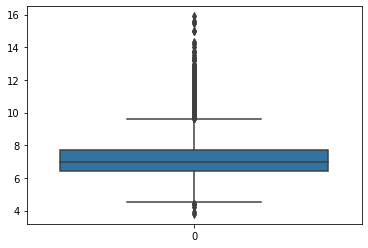

In [4]:
import seaborn as sns

sns.boxplot(data=train['fixed acidity'])

In [8]:
import numpy as np

quantile_25 = np.quantile(train['fixed acidity'], 0.25)
quantile_75 = np.quantile(train['fixed acidity'], 0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR

In [13]:
print(f"quantile_25 : {quantile_25}")
print(f"quantile_75 : {quantile_75}")
print(f"IQR : {IQR}")
print(f"minimum : {minimum}")
print(f"maximum : {maximum}")

quantile_25 : 6.4
quantile_75 : 7.7
IQR : 1.2999999999999998
minimum : 4.450000000000001
maximum : 9.65


In [14]:
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [18]:
train2

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [19]:
train2.shape

(5203, 14)

In [20]:
train.shape[0] - train2.shape[0]

294

In [21]:
# MinMaxScaler

train2.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,2753.771670,5.821065,7.004132,0.332852,0.309366,5.573131,0.054088,31.337113,119.578897,0.994472,3.222862,0.521893,10.504133
std,1587.326459,0.868565,0.906623,0.162106,0.140360,4.828254,0.033831,17.536054,54.483795,0.002926,0.161715,0.143725,1.201914
min,0.000000,3.000000,4.500000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1380.500000,5.000000,6.400000,0.220000,0.240000,1.800000,0.037000,18.000000,86.000000,0.992160,3.110000,0.430000,9.500000
50%,2754.000000,6.000000,6.900000,0.290000,0.300000,3.300000,0.046000,30.000000,121.000000,0.994600,3.210000,0.500000,10.300000
75%,4129.500000,6.000000,7.500000,0.390000,0.380000,8.300000,0.060000,42.000000,157.000000,0.996660,3.330000,0.590000,11.300000
max,5496.000000,9.000000,9.600000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000


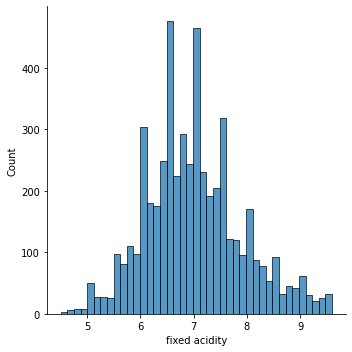

In [23]:
import seaborn as sns

sns.displot(train2['fixed acidity'])

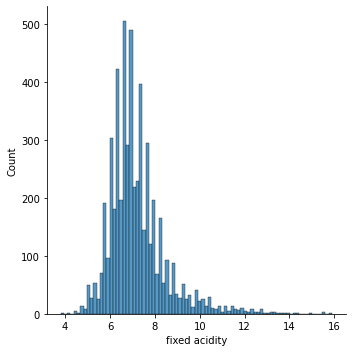

In [24]:
sns.displot(train['fixed acidity'])

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train2[['fixed acidity']])

MinMaxScaler()

In [33]:
scaler.transform(train2[['fixed acidity']])

array([[0.21568627],
       [0.84313725],
       [0.66666667],
       ...,
       [0.64705882],
       [0.41176471],
       [0.49019608]])

In [35]:
train2['Scaled fixed acidity'] = scaler.transform(train2[['fixed acidity']])

C:\Users\freshman\AppData\Local\Temp/ipykernel_16304/1865725359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Scaled fixed acidity'] = scaler.transform(train2[['fixed acidity']])


In [36]:
train2['Scaled fixed acidity']

0       0.215686
1       0.843137
2       0.666667
3       0.490196
4       0.647059
          ...   
5492    0.627451
5493    0.352941
5494    0.647059
5495    0.411765
5496    0.490196
Name: Scaled fixed acidity, Length: 5203, dtype: float64

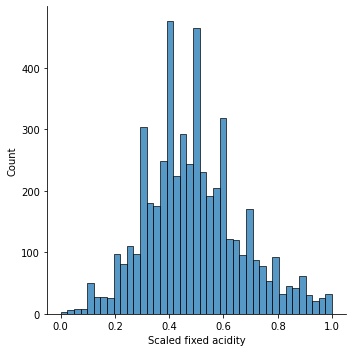

In [37]:
sns.displot(train2['Scaled fixed acidity'])

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# type 피쳐 학습
encoder.fit(train2[['type']])

# 학습한 encoder로 train2의 type 피쳐를 변환
onehot = encoder.transform(train2[['type']])

# array로 변환
onehot = onehot.toarray()

# array를 DataFrame으로 변환
onehot = pd.DataFrame(onehot)

In [66]:
# onehot의 컬럼을 학습한 encoder의 피쳐 이름으로 변경
onehot.columns = encoder.get_feature_names()

# onehot을 원본 데이터에 병합
onehot = pd.concat([train2, onehot], axis=1)

In [68]:
train2 = train2.drop(columns=['type'])

In [70]:
onehot

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,x0_red,x0_white
0,0.0,5.0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.215686,0.0,1.0
1,1.0,5.0,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.843137,1.0,0.0
2,2.0,5.0,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.666667,0.0,1.0
3,3.0,6.0,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.490196,0.0,1.0
4,4.0,6.0,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.647059,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492.0,5.0,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white,0.627451,NaN,NaN
5493,5493.0,6.0,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white,0.352941,NaN,NaN
5494,5494.0,7.0,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white,0.647059,NaN,NaN
5495,5495.0,5.0,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white,0.411765,NaN,NaN


In [71]:
# 코드 단순화
train = pd.read_csv('data/train.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train, onehot], axis = 1).drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0
